In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats as sst

In [24]:
path1 = '/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/武汉病毒基因组序列数据/MT259251.genome.fasta'
path2 = '/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/武汉病毒基因组序列数据/sequence（武汉病毒所发布的新冠状病毒全基因组序列）.fasta'

In [25]:
loadfile = lambda path : [i.replace('\n','') for i in open(path,'r').readlines()]

## 初始信息

In [26]:
info1 , info2 = loadfile(path1) , loadfile(path2)

## 初始数据

In [27]:
data1 , data2 = info1[1:],info2[1:]

In [28]:
len(data1[0]),len(data2[0])

(60, 70)

## 字母转码

In [29]:
data_to_number = lambda data : np.array([[ord(j) for j in i] for i in data])

In [30]:
data_to_number1,data_to_number2 = data_to_number(data1),data_to_number(data2)
data_to_number1[0][:10],data_to_number2[0][:10]

([67, 67, 84, 84, 84, 65, 65, 67, 84, 84],
 [67, 67, 84, 84, 67, 67, 67, 65, 71, 71])

## 循环皮尔逊系数

## 并单组信息行并降维

In [31]:
reduce_the_dimension_of_the_data = lambda data_table : np.array([i for j in range(len(data_table)) for i in data_table[j]])

In [32]:
reduce_dim1 , reduce_dim2 = reduce_the_dimension_of_the_data(data_to_number1) ,reduce_the_dimension_of_the_data(data_to_number2)
reduce_dim1[:10] , reduce_dim2[:10] 

(array([67, 67, 84, 84, 84, 65, 65, 67, 84, 84]),
 array([67, 67, 84, 84, 67, 67, 67, 65, 71, 71]))

## 信息差

In [33]:
info_cur_one_dim = {chr(i):i for i in set(reduce_dim1)^set(reduce_dim2)}
info_cur_one_dim

{'M': 77}

## 信息向量

In [34]:
Uset = list(set(list(reduce_dim1))|set(list(reduce_dim2)))
vector_of_info = lambda reduce_dim :np.array([Uset.index(i) for i in reduce_dim])

In [35]:
vector_of_info1 ,vector_of_info2 = vector_of_info(reduce_dim1) ,vector_of_info(reduce_dim2)

In [36]:
m1 , m2 = vector_of_info1.shape , vector_of_info2.shape
maxm = m1<m2 and m1[0] or m2[0]
maxm,m1[0]-m2[0]

(29868, 16)

## 基因片段对比结果美国基因片段的总数量要比中国多出16个片段

In [37]:
def data_to_mat(data):
    numberList = data_to_number(data)
    maxrows =  max([len(i) for i in numberList]) 
    insert_nan = [i if len(i) == maxrows else [type(z)==str and eval(z) or z  for z in i+('np.nan,'*(maxrows-len(i))).split(',')[:-1]]  for i in numberList]
    return np.array(insert_nan)

In [38]:
mat1,mat2= data_to_mat(data1),data_to_mat(data2)

In [39]:
mat1.shape,mat2.shape

((499, 60), (428, 70))

## 均值函数

In [40]:
def myavg(vector):
    m = vector.shape[0]
    return np.dot(vector,np.ones(m))/m

In [41]:
myavg(vector_of_info1),np.mean(vector_of_info1,axis=0),

(1.4136661758800697, 1.4136661758800697)

## 平方和函数

In [42]:
def myporw2(vector):
    return np.dot(vector,vector.T)

In [43]:
myporw2(vector_of_info1)

96598

## 方差函数

In [44]:
def myvar(vector):
    m = vector.shape
    cur = (vector-myavg(vector))
    return np.dot(cur,cur.T)/m[0]

In [45]:
myvar(vector_of_info1),np.var(vector_of_info1)

(1.233980013845889, 1.2339800138458901)

## 事件发生概率

In [ ]:
def myP(SET,A):
    m = SET.shape[0]
    return np.dot((SET==A).astype(int),np.ones(m))/m

## 标准差函数

In [46]:
def mystd1(vector):
    m = vector.shape[0]
    return np.sqrt(myvar(vector))

In [47]:
mystd1(vector_of_info1),np.std(vector_of_info1)

(1.1108465302848494, 1.11084653028485)

In [48]:
mystd1(vector_of_info1)-mystd1(vector_of_info2)

0.00052657342973216892

## 无偏标准差函数

In [49]:
def  mystd2(vector):
    m = vector.shape[0]
    return np.sqrt(myvar(vector))

In [50]:
mystd2(vector_of_info1),np.std(vector_of_info1,axis=0)

(1.1108465302848494, 1.11084653028485)

## 协方差函数

In [51]:
def mycov(vector1,vector2):
    m = vector1.shape[0]
    return np.dot((vector1-myavg(vector1)),(vector2-myavg(vector2)))/(m-1)

In [52]:
mycov(vector_of_info1[:maxm],vector_of_info2[:maxm])

-0.0054600707841458325

## scipy 返回的是标协方差矩阵

In [53]:
scipy.cov(vector_of_info1[:maxm],vector_of_info2[:maxm])

array([[ 1.23361122, -0.00546007],
       [-0.00546007,  1.23285168]])

## numpy 标准返回的是协方差矩阵

In [54]:
np.cov(vector_of_info1[:10],vector_of_info2[:10])

array([[ 0.67777778,  0.5       ],
       [ 0.5       ,  0.94444444]])

## 变异系数

In [55]:
def mycoe(vector):
    return mystd2(vector)/myavg(vector)

In [56]:
mycoe(vector_of_info1),mycoe(vector_of_info2)

(0.78579126333930871, 0.7850725929489285)

## 标准化/标准分数

In [57]:
def zscore(vector):
    return (vector-myavg(vector))/mystd2(vector)

In [58]:
zscore(vector_of_info1)

array([-0.37238823, -0.37238823,  0.52782613, ..., -1.27260259,
       -1.27260259, -1.27260259])

## 相关系数

In [59]:
def pearson(vector1,vector2):
    n = vector1.shape[0]
    sum_arr1 , sum_arr2 = vector1.sum() , vector2.sum()
    sum_pow_arr1,sum_pow_arr2 = np.dot(vector1,vector1) , np.dot(vector2,vector2)
    p_sum_arr = np.dot(vector1,vector2)
    cov = p_sum_arr-(sum_arr1*sum_arr2/n)
    std = np.sqrt((sum_pow_arr1 - (sum_arr1** 2) / n) * (sum_pow_arr2 - (sum_arr2** 2) / n))
    return cov/std

In [60]:
vector_of_info1[:-17-1].shape,vector_of_info2[:-1-1].shape

((29866,), (29866,))

## 均方误差

In [61]:
def MSE(yhat,y):
    return np.dot(yhat-myavg(y),yhat-myavg(y))

### $ 回归方程( X^{T}X )^{-1} X^{T} Y $

In [62]:
def EquationRegression(X,Y,predict=False):
    xm,xn = X.shape
    ym,yn = Y.shape
    newX = np.c_[np.ones(xm),X]
    fit = np.dot(np.dot(np.linalg.inv(np.dot(newX.T,newX)),newX.T),Y)
    if predict:
        predictX = np.dot(np.r_[np.ones(1),np.array(predict)],fit) 
        return fit,predictX
    else:
        return fit 

In [63]:
x = np.array([[62.47, 2.0], [65.78, 3.0], [58.05, 2.0], [52.09, 2.0], [74.98, 3.0], [55.87, 2.0], [90.66, 3.0], [113.68, 3.0], [97.92, 2.0], [46.33, 2.0], [134.55, 3.0], [151.15, 3.0], [63.01, 2.0], [65.66, 2.0], [108.81, 3.0], [66.19, 3.0], [54.1, 2.0], [73.44, 2.0], [51.78, 2.0], [92.42, 3.0], [59.13, 2.0], [49.49, 1.0], [51.68, 2.0], [52.87, 2.0], [69.46, 2.0], [76.41, 2.0], [63.1, 2.0], [197.37, 5.0], [93.53, 3.0], [91.35, 3.0], [103.49, 3.0], [45.12, 2.0], [59.59, 2.0], [174.66, 4.0], [35.8, 1.0], [91.35, 3.0], [55.07, 2.0], [119.44, 3.0], [65.85, 2.0], [72.05, 3.0], [85.98, 3.0], [103.29, 4.0], [184.05, 5.0], [90.87, 3.0], [38.83, 1.0], [51.65, 1.0], [50.14, 1.0]])
y = np.array([[213.0], [226.0], [179.0], [188.0], [215.0], [152.0], [290.0], [375.0], [305.0], [166.0], [385.0], [500.0], [195.0], [200.0], [310.0], [205.0], [158.0], [270.0], [150.0], [310.0], [180.0], [200.0], [155.0], [178.0], [303.0], [250.0], [218.0], [630.0], [326.0], [310.0], [530.0], [138.0], [230.0], [560.0], [115.0], [400.0], [140.0], [547.0], [240.0], [250.0], [315.0], [330.0], [680.0], [302.0], [130.0], [162.0], [140.0]]) 

In [64]:
EquationRegression(x,y)

array([[-10.05555624],
       [  3.3947143 ],
       [  4.20559162]])

## 滑动皮尔逊系数

In [65]:
[pearson(vector_of_info1[:-17-i],vector_of_info2[:-1-i]) for i in range(vector_of_info1.shape[0] - vector_of_info2.shape[0])]

[-0.0044820058340799612,
 -0.0045365708857217123,
 -0.0045911455205145408,
 -0.004645729740983524,
 -0.0047003235496541765,
 -0.0047549269490530536,
 -0.0048095399417079415,
 -0.0048641625301470703,
 -0.0049187947168995135,
 -0.0049734365044957719,
 -0.0050280878954665972,
 -0.0050827488923439771,
 -0.005098847778685597,
 -0.0051535232426577213,
 -0.0051696290210440591,
 -0.005147296520789435]

## 滑动皮尔逊函数

In [66]:
pearson_arr = lambda alpha : np.array([pearson(vector_of_info1[0:i+alpha],vector_of_info2[0:i+alpha]) for i in range(vector_of_info2.shape[0]//alpha)])

In [67]:
movepearson = [pearson_arr(i) for i in range(2,20000)]

## 皮尔逊滑动范围变化

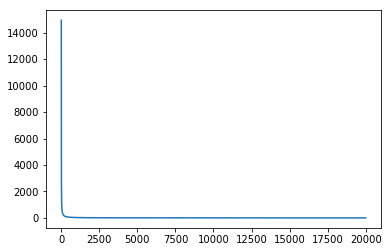

In [68]:
plt.plot([i.shape[0] for i in movepearson])

## 随着滑动的步长越来越大,


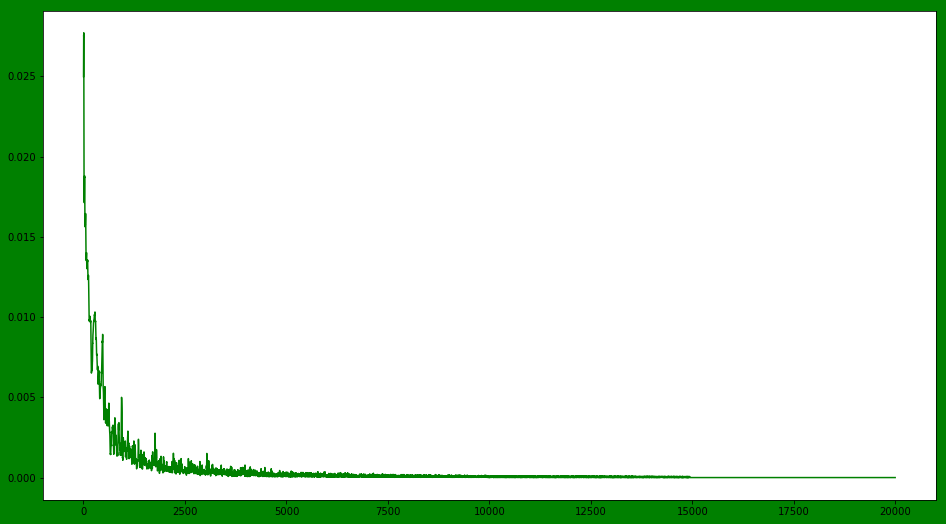

In [69]:
plt.figure(figsize=(16,9),facecolor='g')
plt.plot([mystd1(i) for i in movepearson],c='g')

## 定长窗口100

In [70]:
pearson_constand = lambda alpha : np.array([pearson(vector_of_info1[:i+alpha],vector_of_info2[:i+alpha]) for i in range(vector_of_info2.shape[0]//alpha)])

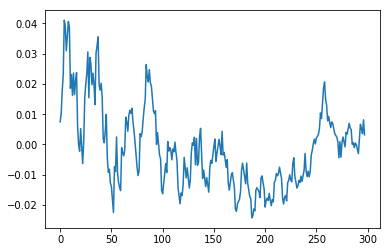

In [71]:
plt.plot(pearson_constand(100))

## 定长窗口200

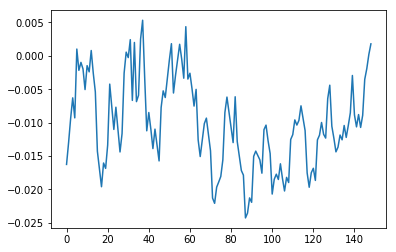

In [72]:
plt.plot(pearson_constand(200))

## 定长窗口1000

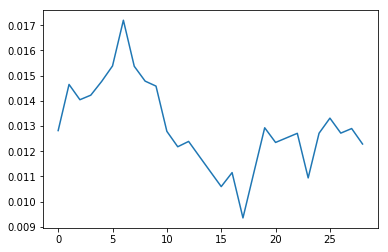

In [73]:
plt.plot(pearson_constand(1000))

## 定长窗口2000

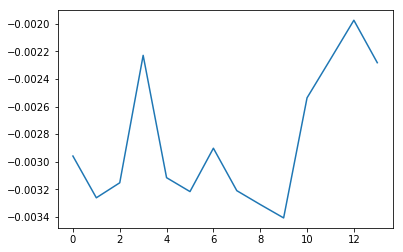

In [74]:
plt.plot(pearson_constand(2000))

## 定长窗口10000

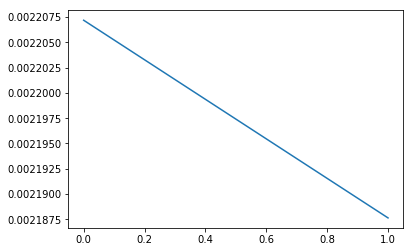

In [75]:
plt.plot(pearson_constand(10000))

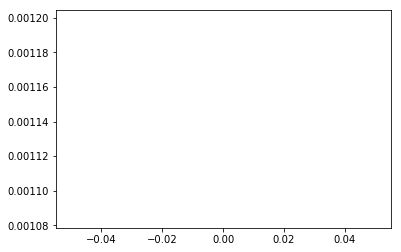

In [76]:
plt.plot(pearson_constand(20000))

In [77]:
m = len(movepearson)
gradient = lambda alpha : [alpha- (mystd1(i)/m)*mystd1(i) for i in movepearson]

In [78]:
gradMovePreason = gradient(0.1)

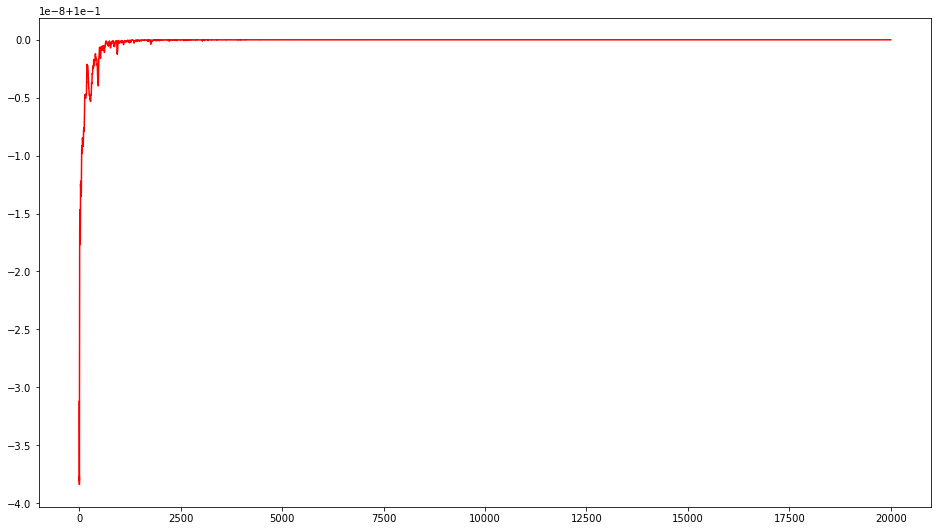

In [79]:
plt.figure(figsize=(16,9))
plt.plot(gradMovePreason,c='r')
plt.plot([i for i in gradMovePreason if (i-0)<0.01 ] , c='y')

## 拉动皮尔逊函数

In [80]:
person_same = lambda alpha : np.array(
    [pearson(vector_of_info1[i:i+alpha],vector_of_info2[i:i+alpha]) 
    for i in 
    range(0,vector_of_info2.shape[0]//alpha)]
    )

In [81]:
the_some_length = [person_same(i) for i in range(3,20000)]

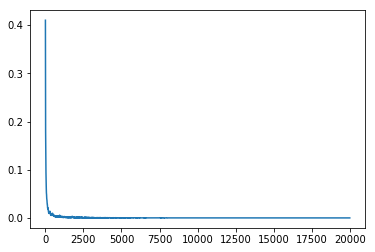

In [82]:
plt.plot([mystd2(i) for i in the_some_length])

In [83]:
comp = vector_of_info2.shape[0]<vector_of_info1.shape[0] and vector_of_info2.shape[0] or vector_of_info1.shape[0]
comp

29868

In [84]:
person_longht = lambda alpha : np.array([pearson(vector_of_info1[0:i],vector_of_info2[0:i]) for i in range(alpha,comp)])

In [85]:
pearson(vector_of_info1[:maxm],vector_of_info2[:maxm])

-0.0044274503630656473

In [86]:
sst.pearsonr(vector_of_info1[:maxm],vector_of_info2[:maxm])

(-0.0044274503630656005, 0.44418837455651505)

## 相关系数矩阵

In [87]:
def myprson(vector):
    mean = np.mean(vector,axis=0) 
    std = np.std(vector,axis=0)
    zscore = (vector-mean)/std
    return  np.corrcoef(zscore) 

In [88]:
myprson(mat1[:-1])

array([[ 1.        , -0.11159586, -0.34013348, ...,  0.16472626,
        -0.03309648,  0.09159422],
       [-0.11159586,  1.        ,  0.10580829, ..., -0.05682208,
        -0.00402002,  0.08878225],
       [-0.34013348,  0.10580829,  1.        , ...,  0.11473272,
         0.11169054, -0.19158077],
       ..., 
       [ 0.16472626, -0.05682208,  0.11473272, ...,  1.        ,
        -0.01720015, -0.08344849],
       [-0.03309648, -0.00402002,  0.11169054, ..., -0.01720015,
         1.        , -0.03580462],
       [ 0.09159422,  0.08878225, -0.19158077, ..., -0.08344849,
        -0.03580462,  1.        ]])

## k-means 函数

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.setrecursionlimit(10000)
np.set_printoptions(suppress=True)

def quarterback_method(vector):
    '''
    四分位法
    :param vector:
    :return:
    '''
    lower_q = np.quantile(vector, 0.25, interpolation='lower')  # 下四分卫数
    higher_q = np.quantile(vector, 0.75, interpolation='higher')  # 上四分位数
    middle_q = np.median(vector)  # 中位数
    int_r = higher_q - lower_q  # 四分位距
    numbers = [lower_q, middle_q, higher_q, int_r]  # 分位数整理
    data = [vector[vector < i] for i in numbers][:-1]  # 前75%分位的数
    new_data = np.setdiff1d(vector, np.hstack((data[1], data[2])))  # 后25分位的数
    return numbers, data + [new_data]  # 分位数和四分位后的数据


def K_point(number):
    '''
    随机选择K中心
    :param number:
    :return:
    '''
    K = lambda: data[np.random.randint(len(data))]
    return [np.array(K())[0] for i in range(number)]

def random_point(number):
    '''
    随机选择K中心
    :param number:
    :return:
    '''
    K = lambda: data[np.random.randint(len(data))]
    return [np.array(K())[0] for i in range(number)]


def euclidean_distance(pointA, pointB):
    '''
    欧式距离计算公式
    :param pointA:
    :param pointB:
    :return:
    '''
    return np.array(np.sqrt(np.dot(np.power((pointA - pointB), 2), np.ones(2))))[0]


def mean_point(dataset):
    '''
    求中心点
    :param dataset:
    :return:
    '''
    x_mean = (np.squeeze(np.array(dataset[:,0:1]))/len(dataset)).sum()
    y_mean = (np.squeeze(np.array(dataset[:,-1:]))/len(dataset)).sum()
    return np.array([x_mean, y_mean])


def error_sum_of_squares(new_K, old_K):
    '''
    误差平方和
    :param data:
    :param K:
    :return:
    '''
    return ((old_K - new_K) ** 2).sum()


def K_means(dataset, K_point, restart=0):
    '''标准计算循环完成K-means,误差平方和版本'''
    #print('restart', restart)

    expr1 = [(np.array(i)[0], [euclidean_distance(j, np.array(i)) for j in K_point]) for i in dataset]

    NK = -1
    classified_of_data = []
    new_K_point = []
    for kindex in range(len(K_point)):
        NK += 1
        kindex = []
        for i in range(len(expr1)):
            Name = expr1[i][-1].index(min(expr1[i][-1]))
            data = list(np.array(dataset[i])[0])  # 最近的点的下标
            if Name == NK:
                kindex.append(data)
            else:
                pass

        new_K_point.append(mean_point(np.mat(kindex)))  # 新的k点整理数据结构
        classified_of_data.append(np.mat(kindex))

    error_sum_of_squares = sum([((mean_point(i)-j)**2).sum() for i,j in zip(classified_of_data,K_point)]) #误差平方和

    if error_sum_of_squares == 0 : # 如果不满足分类条件，则递归继续
        print('Ok , K-means 平方误差和版')
        return np.array(new_K_point), classified_of_data
    else:
        restart += 1
        return K_means(dataset, new_K_point, restart)


def K_means_run(class_number, all_datas, drawing=False):
    '''
    误差平方和版本
    :param class_number:
    :param all_datas:
    :param drawing:
    :return:
    '''
    k_of_constant = K_point(class_number)
    result = K_means(all_datas, k_of_constant, 0)

    if drawing == True:
        for data, k in zip(result[-1], result[0]):
            x, y = np.squeeze(np.array(data[:, 0:1])), np.squeeze(np.array(data[:, -1:]))  # ,
            plt.scatter(x, y)
            plt.scatter(k[0], k[-1], c='black', marker='x', alpha=1.0)
        plt.show()
        plt.close()
    else:
        pass
    return result

## 数据标准化

In [90]:
y1 = np.array([myavg(i)/mystd2(i) for i in mat1])
x1 = np.arange(y1.shape[0])
data11 = np.mat(np.c_[x1,y1])[:-1]
data11[-10:]

matrix([[ 488.        ,    9.32553222],
        [ 489.        ,   12.21924828],
        [ 490.        ,    9.02985201],
        [ 491.        ,   10.47602545],
        [ 492.        ,    8.9738901 ],
        [ 493.        ,    8.86527765],
        [ 494.        ,    9.26586427],
        [ 495.        ,   10.93643009],
        [ 496.        ,    8.76153369],
        [ 497.        ,   12.27711826]])

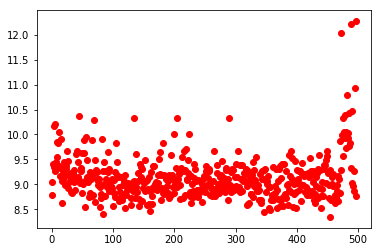

In [91]:
plt.scatter(x1,y1,c='r')

In [92]:
y2 = np.array([myavg(i)/mystd2(i) for i in mat2])
x2 = np.arange(y2.shape[0])
data22 = np.mat(np.c_[x2,y2])[:-2]
data22[-10:]

matrix([[ 416.        ,   10.41516434],
        [ 417.        ,    9.81642549],
        [ 418.        ,    8.96508436],
        [ 419.        ,   12.17105241],
        [ 420.        ,    9.35704103],
        [ 421.        ,   10.63981408],
        [ 422.        ,    8.78315032],
        [ 423.        ,    8.74497912],
        [ 424.        ,   10.69961441],
        [ 425.        ,    9.15350352]])

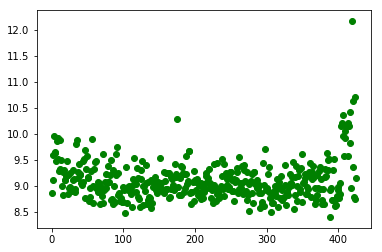

In [93]:
plt.scatter(x2,y2,c='g')

## 标准化后聚类

In [94]:
from sklearn.cluster import KMeans

In [95]:
def kmeans_building_from_sklearn(data,types_num,types_init = "k-means++"):
    kmeans_model = KMeans(n_clusters=types_num, init=types_init).fit(data) 
    newdata = np.c_[kmeans_model.labels_,np.array(data)]    
    slice_ = [np.squeeze((newdata==i)[:,0:1]) for i in range(types_num)]

    return [newdata[i] for i in slice_],kmeans_model.cluster_centers_,slice_,kmeans_model.inertia_,kmeans_model.n_iter_

In [96]:
to_array_2 = lambda data : np.array(np.squeeze(data))[0]

## 第一株

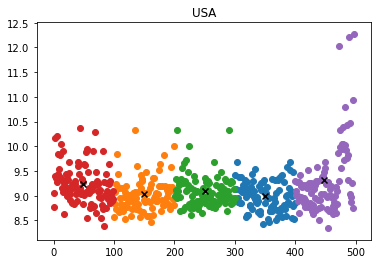

In [97]:

result = kmeans_building_from_sklearn(data11, 5) # 本例要分3类，所以传入一个3
x = [to_array_2(data11[i][:,0:1]) for i in result[2]]
y = [to_array_2(data11[i][:,-1:]) for i in result[2]]
for i,j,Kp in zip(x,y,result[1]):
    plt.scatter(i,j)
    plt.scatter(Kp[0],Kp[-1],c='black', marker='x', alpha=1.0)
plt.title('USA')
plt.show()
plt.close()

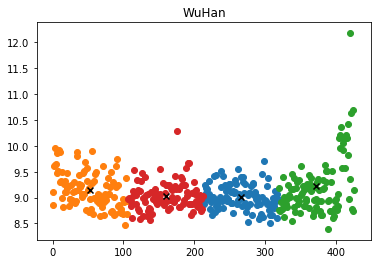

In [98]:
result = kmeans_building_from_sklearn(data22, 4) # 本例要分3类，所以传入一个3
x = [to_array_2(data22[i][:,0:1]) for i in result[2]]
y = [to_array_2(data22[i][:,-1:]) for i in result[2]]
for i,j,Kp in zip(x,y,result[1]):
    plt.scatter(i,j)
    plt.scatter(Kp[0],Kp[-1],c='black', marker='x', alpha=1.0)
plt.title('WuHan')
plt.show()
plt.close()

In [99]:
import jieba
import math
from scipy import spatial
import numpy as np

class cosine_similarity_of_text:

    def __init__(self,strings1=None,strings2=None,model='fitnumpy'):
        self.strings1 , self.strings2 = strings1 , strings2
        self.strings1_cut, self.strings2_cut = self.cut(strings1), self.cut(strings2)
        self.strings1_cut_code ,self.strings2_cut_code = self.cut_code(self.strings1_cut) , self.cut_code(self.strings2_cut)
        self.frequency_of_word1 = self.frequency_of_word(self.strings1_cut,self.strings1_cut_code)
        self.frequency_of_word2 = self.frequency_of_word(self.strings2_cut,self.strings2_cut_code)
        if model == 'numpy':
            self.fit = self.full_npcosine(np.array(self.frequency_of_word1),np.array(self.frequency_of_word2))
        elif model == 'python':
            self.fit =self.full_pycosine(self.frequency_of_word1, self.frequency_of_word2).__next__()

    def cut(self,strings):
        '''
        分词
        :param strings:
        :return:
        '''
        return [i for i in jieba.cut(strings, cut_all=True) if i != '']

    def word_set(self):
        '''
        并集词汇表
        :return:
        '''
        return set(self.strings1_cut) | (set(self.strings2_cut))

    def word_dict(self):
        '''
        创建字典
        :return:
        '''
        return {tuple(self.word_set())[i]: i for i in range(len(self.word_set()))}

    def cut_code(self,cut):
        '''
        单文词语编码
        :param cut:
        :return:
        '''
        return (self.word_dict()[word] for word in cut)

    def frequency_of_word(self,string_cut,string_cut_code):
        '''
        统计词频生成词向量
        :param string_cut:
        :param string_cut_code:
        :return:
        '''
        dict_ = self.word_dict()
        string_cut_code = string_cut_code
        string_cut_code = [0] * len(dict_)
        for word in string_cut:
            string_cut_code[dict_[word]] += 1
        return (string_cut_code)

    def full_pycosine(self,vector1,vector2):
        '''
        python数据结构计算余弦相似度
        :param vector1:
        :param vector2:
        :return:
        '''
        sum = 0
        sqrt1 = 0
        sqrt2 = 0
        for i in range(len(vector1)):
            sum += vector1[i] * vector2[i]
            sqrt1 += pow(vector1[i], 2)
            sqrt2 += pow(vector2[i], 2)
        try:
            result = yield round(float(sum) / (math.sqrt(sqrt1) * math.sqrt(sqrt2)), 2)
        except ZeroDivisionError:
            result = 0.0
        return result

    def full_npcosine(self,vector1,vector2):
        '''
        scipy方法创建ndarray结构的余弦相似度
        :param vector1: 
        :param vector2: 
        :return: 
        '''
        return spatial.distance.cosine(vector1,vector2)

    def __del__(self):
        pass


In [100]:
def hamming(x, y):
    return sum(x!=y)/len(x)

## 单组元素信息表

In [101]:
dict_of_info = lambda data,data_to_number : {index_of_dict:(letter,number) for letter,number,index_of_dict in zip(reduce_the_dimension_of_the_data(data),reduce_the_dimension_of_the_data(data_to_number),range(len(reduce_the_dimension_of_the_data(data_to_number))))}

## 分组元素字典

In [102]:
dict1 ,dict2 = dict_of_info(data1,data_to_number1),dict_of_info(data2,data_to_number2)
dict1[1],dict2[1]

(('C', 67), ('C', 67))

## 顺序差

In [103]:
info_cur_of_number = [dict1[i][-1]-dict2[i][-1] for i in range(min([len(dict2),len(dict1)]))]

## 组并集

In [104]:
unindata = (set(data1)|set(data2))

## 组并集去重

In [105]:
element = tuple(set([j for i in range(len(unindata)) for j in tuple(unindata)[i]]))

## 测量一下文本描述的余弦相似度，为批量导入数据做准备测试

In [106]:

cosine_similarity_of_text(info1[0],info2[0],model='python').fit

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/sl/q8x6_03132dfk7rktf00yh880000gn/T/jieba.cache
Loading model cost 0.730 seconds.
Prefix dict has been built successfully.


0.89

## 对比成分差异

In [118]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## 频率分析

In [119]:
def frequency(data):
    drop = lambda data:[j for i in range(len(data)) for j in data[i]]
    dropdata = drop(data)
    setdata = tuple(set(dropdata))
    vector = np.array([setdata.index(i) for i in dropdata])
    logistic = set(sigmoid(vector))
    name =  np.array(['name','p','sigmoid','count'])
    unin = np.array([(i,dropdata.count(i)/len(data),l,dropdata.count(i)) for i,l in zip(setdata,logistic)])
    return {'unin':[name,unin],'element':setdata,'count':len(dropdata)}

In [120]:
'武汉元素分布比例',frequency(data2),'美国元素分布比例',frequency(data1)

('武汉元素分布比例',
 {'unin': [array(['name', 'p', 'sigmoid', 'count'],
         dtype='<U7'),
   array([['C', '12.836448598130842', '0.5', '5494'],
          ['T', '22.399532710280372', '0.73105857863', '9587'],
          ['A', '20.86214953271028', '0.880797077978', '8929'],
          ['G', '13.686915887850468', '0.952574126822', '5858']],
         dtype='<U18')],
  'element': ('C', 'T', 'A', 'G'),
  'count': 29868},
 '美国元素分布比例',
 {'unin': [array(['name', 'p', 'sigmoid', 'count'],
         dtype='<U7'),
   array([['A', '17.939879759519037', '0.880797077978', '8952'],
          ['T', '19.22444889779559', '0.73105857863', '9593'],
          ['C', '10.97995991983968', '0.982013790038', '5479'],
          ['G', '11.741482965931864', '0.952574126822', '5859'],
          ['M', '0.002004008016032064', '0.5', '1']],
         dtype='<U20')],
  'element': ('A', 'T', 'C', 'G', 'M'),
  'count': 29884})

##  比较相同元素的位置

In [292]:
def compare(Asrc,Bsrc):
    Aset = set(Asrc)
    drop = lambda data:[j for i in range(len(data)) for j in data[i]]
    A,B = drop(Asrc),drop(Bsrc)
    Am ,Bm = len(A),len(B)
    thesame = [[(A[An],An,Bn)for Bn in range(Bm) if  A[An]==B[Bn]] for An in range(Am)]
    different = [[(A[An],An,Bn)for Bn in range(Bm) if  A[An]!=B[Bn]] for An in range(Am)]
    return {'different':drop(sorted(different)),'thesame':drop(sorted(thesame))}

In [288]:
different,thesame = compare(data1,data2)

## 信息熵

In [291]:
from math import log
def cal_entropy(data):
    ltries = len(data)
    labelcounts = {}
    for feat in data:
        label = feat[-1]
        if label not in labelcounts.keys():
            labelcounts[label] = 0
        labelcounts[label] += 1
    entropy = 0.0
    for key in labelcounts.keys():
        p_i = float(labelcounts[key]/ltries)
        entropy -= p_i * log(p_i,2)
    return entropy

cal_entropy(different)

2.725480556997868

In [112]:
pinfo2,pinfo1

({'A': 0.7310585786300049,
  'T': 0.88079707797788231,
  'C': 0.95257412682243336,
  'G': 0.5},
 {'A': 0.7310585786300049,
  'T': 0.88079707797788231,
  'C': 0.98201379003790845,
  'G': 0.95257412682243336,
  'M': 0.5})

## 组字典

In [113]:
dict_of_set = {tuple(unindata)[i]:i for i in range(len(unindata))}

## 观察得到武汉的基因组行数比美国要短

In [114]:
len(data1),len(data2),info1[0],info2[0]

(499,
 428,
 '>MT259251 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/WA-UW259/human/2020/USA| complete genome|USA: WA|Homo sapiens|Severe acute respiratory syndrome-related coronavirus|complete',
 '>MT259226.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Wuhan_OS52/2020, complete genome')

## 两组毒株不存在行向量的包含关系

In [115]:
(set(data1)>set(data2)),(set(data1)<set(data2))

(False, False)

In [116]:
(set(data1)&set(data2))

set()

## 单行差异完全

In [117]:
len(set(data1)^set(data2))-len((set(data1)|set(data2)))

0